In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [2]:
passenger_data=pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
passenger_data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [3]:
passenger_data.shape

(8693, 14)

In [4]:
passenger_data.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

<AxesSubplot:>

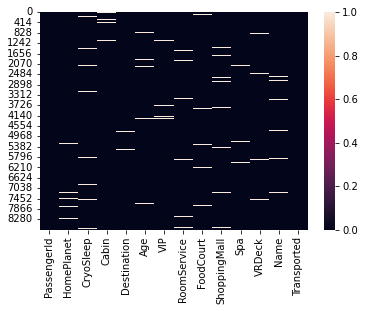

In [5]:
import seaborn as sns
sns.heatmap(passenger_data.isnull())

In [6]:
passenger_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [7]:
passenger_data.HomePlanet = passenger_data.HomePlanet.fillna('0')
passenger_data.CryoSleep  = passenger_data.CryoSleep .fillna(0)
passenger_data.Cabin      = passenger_data.Cabin.fillna(0)
passenger_data.Destination = passenger_data.Destination.fillna('0')
passenger_data.Age = passenger_data.Age.fillna(0)
passenger_data.VIP = passenger_data.VIP.fillna(0)
passenger_data.RoomService = passenger_data.RoomService.fillna(0)
passenger_data.FoodCourt = passenger_data.FoodCourt.fillna(0)
passenger_data.ShoppingMall = passenger_data.ShoppingMall.fillna(0)
passenger_data.Spa = passenger_data.Spa.fillna(0)
passenger_data.VRDeck = passenger_data.VRDeck.fillna(0)
passenger_data.Name = passenger_data.Name.fillna('0')

In [8]:
passenger_data.head()


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [9]:
passenger_data['RoomService'] = passenger_data['RoomService'].astype(int)
passenger_data['Age'] = passenger_data['Age'].astype(int)
passenger_data['FoodCourt'] = passenger_data['FoodCourt'].astype(int)
passenger_data['ShoppingMall'] = passenger_data['ShoppingMall'].astype(int)
passenger_data['Spa'] = passenger_data['Spa'].astype(int)
passenger_data['VRDeck'] = passenger_data['VRDeck'].astype(int)

In [10]:
passenger_data.Destination = passenger_data.Destination.replace({'TRAPPIST-1e':'TRAPPIST','55 Cancri e':'Cancri','PSO J318.5-22':'PSO'})
passenger_data['Transported']= passenger_data['Transported'].replace(True,1).replace(False,0)

In [11]:
x = passenger_data.iloc[:,0:13]

In [12]:
x

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0001_01,Europa,False,B/0/P,TRAPPIST,39,False,0,0,0,0,0,Maham Ofracculy
1,0002_01,Earth,False,F/0/S,TRAPPIST,24,False,109,9,25,549,44,Juanna Vines
2,0003_01,Europa,False,A/0/S,TRAPPIST,58,True,43,3576,0,6715,49,Altark Susent
3,0003_02,Europa,False,A/0/S,TRAPPIST,33,False,0,1283,371,3329,193,Solam Susent
4,0004_01,Earth,False,F/1/S,TRAPPIST,16,False,303,70,151,565,2,Willy Santantines
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,Cancri,41,True,0,6819,0,1643,74,Gravior Noxnuther
8689,9278_01,Earth,True,G/1499/S,PSO,18,False,0,0,0,0,0,Kurta Mondalley
8690,9279_01,Earth,False,G/1500/S,TRAPPIST,26,False,0,0,1872,1,0,Fayey Connon
8691,9280_01,Europa,False,E/608/S,Cancri,32,False,0,1049,0,353,3235,Celeon Hontichre


In [13]:
x = passenger_data.drop(columns = ['Cabin','Name','Transported'])

In [14]:
x

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0001_01,Europa,False,TRAPPIST,39,False,0,0,0,0,0
1,0002_01,Earth,False,TRAPPIST,24,False,109,9,25,549,44
2,0003_01,Europa,False,TRAPPIST,58,True,43,3576,0,6715,49
3,0003_02,Europa,False,TRAPPIST,33,False,0,1283,371,3329,193
4,0004_01,Earth,False,TRAPPIST,16,False,303,70,151,565,2
...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,Cancri,41,True,0,6819,0,1643,74
8689,9278_01,Earth,True,PSO,18,False,0,0,0,0,0
8690,9279_01,Earth,False,TRAPPIST,26,False,0,0,1872,1,0
8691,9280_01,Europa,False,Cancri,32,False,0,1049,0,353,3235


In [15]:
y = passenger_data['Transported']

In [16]:
y

0       0
1       1
2       0
3       0
4       1
       ..
8688    0
8689    0
8690    1
8691    0
8692    1
Name: Transported, Length: 8693, dtype: int64

In [17]:
passenger_data.dtypes

PassengerId     object
HomePlanet      object
CryoSleep       object
Cabin           object
Destination     object
Age              int64
VIP             object
RoomService      int64
FoodCourt        int64
ShoppingMall     int64
Spa              int64
VRDeck           int64
Name            object
Transported      int64
dtype: object

In [18]:
x.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0001_01,Europa,False,TRAPPIST,39,False,0,0,0,0,0
1,0002_01,Earth,False,TRAPPIST,24,False,109,9,25,549,44
2,0003_01,Europa,False,TRAPPIST,58,True,43,3576,0,6715,49
3,0003_02,Europa,False,TRAPPIST,33,False,0,1283,371,3329,193
4,0004_01,Earth,False,TRAPPIST,16,False,303,70,151,565,2


In [19]:
x.iloc[:,3].unique()

array(['TRAPPIST', 'PSO', 'Cancri', '0'], dtype=object)

In [20]:
nom = [1,3,2,5]
num = [0,6,7,8,9,10]
bina = [4]

In [21]:
from sklearn.preprocessing import OneHotEncoder , OrdinalEncoder,PowerTransformer,Binarizer
from sklearn.compose import make_column_transformer
from sklearn import set_config
trans = make_column_transformer((OneHotEncoder(sparse = False),nom),
                                #(OrdinalEncoder(),ordi),
                                (PowerTransformer(),num),
                                (Binarizer(),bina),
                                 remainder = 'passthrough')
set_config(display = 'diagram')
trans

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder', OneHotEncoder(sparse=False),
                                 [1, 3, 2, 5]),
                                ('powertransformer', PowerTransformer(),
                                 [0, 6, 7, 8, 9, 10]),
                                ('binarizer', Binarizer(), [4])])

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.25)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Transported', ylabel='count'>

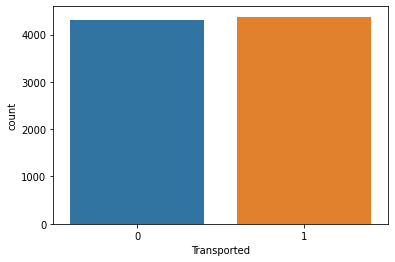

In [23]:
import seaborn as sns
sns.countplot(y)

In [24]:
y.value_counts()

1    4378
0    4315
Name: Transported, dtype: int64

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
lr = LogisticRegression(solver = 'liblinear')
pipe = make_pipeline(trans,lr)
pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  [1, 3, 2, 5]),
                                                 ('powertransformer',
                                                  PowerTransformer(),
                                                  [0, 6, 7, 8, 9, 10]),
                                                 ('binarizer', Binarizer(),
                                                  [4])])),
                ('logisticregression', LogisticRegression(solver='liblinear'))])

In [26]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  [1, 3, 2, 5]),
                                                 ('powertransformer',
                                                  PowerTransformer(),
                                                  [0, 6, 7, 8, 9, 10]),
                                                 ('binarizer', Binarizer(),
                                                  [4])])),
                ('logisticregression', LogisticRegression(solver='liblinear'))])

In [27]:
pred = pipe.predict(x_test)
pred

array([0, 0, 1, ..., 1, 1, 0])

In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(pred,y_test)*100

75.89696412143513

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


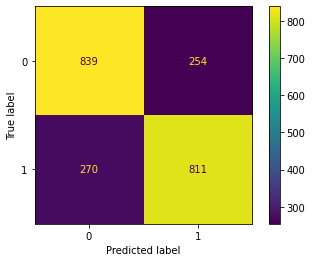

In [29]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(pipe,x_test,y_test)

In [30]:
from imblearn.over_sampling import RandomOverSampler,SMOTE
Over =RandomOverSampler()
o_x,o_y=Over.fit_resample(x,y)
o_y.value_counts()

0    4378
1    4378
Name: Transported, dtype: int64

In [31]:
from imblearn.pipeline import make_pipeline
S = SMOTE()
pipe_s = make_pipeline(trans,S,lr)

In [32]:
pipe_s.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  [1, 3, 2, 5]),
                                                 ('powertransformer',
                                                  PowerTransformer(),
                                                  [0, 6, 7, 8, 9, 10]),
                                                 ('binarizer', Binarizer(),
                                                  [4])])),
                ('smote', SMOTE()),
                ('logisticregression', LogisticRegression(solver='liblinear'))])

In [33]:
pred_s = pipe.predict(x_test)
pred_s

array([0, 0, 1, ..., 1, 1, 0])

In [34]:
accuracy_score(pred_s,y_test)*100

75.75896964121435

In [35]:
from sklearn.svm import SVC
algorithm = SVC()
pipe_a = make_pipeline(trans,S,algorithm)

In [36]:
pipe_a.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  [1, 3, 2, 5]),
                                                 ('powertransformer',
                                                  PowerTransformer(),
                                                  [0, 6, 7, 8, 9, 10]),
                                                 ('binarizer', Binarizer(),
                                                  [4])])),
                ('smote', SMOTE()), ('svc', SVC())])

In [37]:
pred_a =pipe.predict(x_test)
pred_a

array([0, 0, 1, ..., 1, 1, 0])

In [38]:
accuracy_score(pred_a,y_test)*100

75.75896964121435

In [39]:
from sklearn.ensemble import GradientBoostingClassifier
GB = GradientBoostingClassifier(n_estimators = 300,min_samples_leaf = 4) 
pipe_GB = make_pipeline(trans,S,GB)

In [40]:
pipe_GB.fit(x_train,y_train)
pred_gb = pipe_GB.predict(x_test)
accuracy_score(pred_gb,y_test)*100

79.6688132474701

In [41]:
from sklearn.ensemble import RandomForestClassifier
F = RandomForestClassifier(n_estimators = 100,criterion = 'entropy')
pipe_F = make_pipeline(trans,S,F)

In [42]:
pipe_F.fit(x_train,y_train)
pred_F = pipe_F.predict(x_test)
accuracy_score(pred_F,y_test)*100

76.7709291628335

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


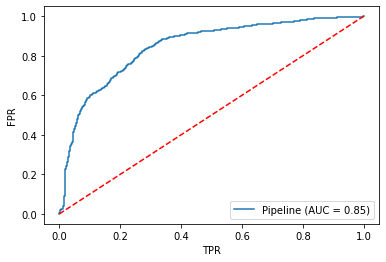

In [43]:
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt

plot_roc_curve(pipe_a,x_test,y_test)

plt.plot([0,1],[0,1],"r--")        

plt.xlabel("TPR")
plt.ylabel("FPR")
plt.show()

In [44]:
test_data = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')
test_data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [45]:
test_data.iloc[:,3].unique()

array(['G/3/S', 'F/4/S', 'C/0/S', ..., 'D/296/P', 'D/297/P', 'G/1498/S'],
      dtype=object)

In [46]:
test_data.Destination = test_data.Destination.replace({'TRAPPIST-1e':'TRAPPIST','55 Cancri e':'Cancri','PSO J318.5-22':'PSO'})

In [47]:
test_data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,Cancri,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,Cancri,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [48]:
test_data.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [49]:
test_data.HomePlanet = test_data.HomePlanet.fillna('0')
test_data.CryoSleep  = test_data.CryoSleep .fillna(0)
test_data.Cabin      = test_data.Cabin.fillna(0)
test_data.Destination = test_data.Destination.fillna('0')
test_data.Age = test_data.Age.fillna(0)
test_data.VIP = test_data.VIP.fillna(0)
test_data.RoomService = test_data.RoomService.fillna(0)
test_data.FoodCourt = test_data.FoodCourt.fillna(0)
test_data.ShoppingMall = test_data.ShoppingMall.fillna(0)
test_data.Spa = test_data.Spa.fillna(0)
test_data.VRDeck = test_data.VRDeck.fillna(0)
test_data.Name = test_data.Name.fillna('0')

In [50]:
test_data['RoomService'] = test_data['RoomService'].astype(int)
test_data['Age'] = test_data['Age'].astype(int)
test_data['FoodCourt'] = test_data['FoodCourt'].astype(int)
test_data['ShoppingMall'] = test_data['ShoppingMall'].astype(int)
test_data['Spa'] = test_data['Spa'].astype(int)
test_data['VRDeck'] = test_data['VRDeck'].astype(int)

In [51]:
x1 = test_data.drop(columns = ['Cabin','Name'])

In [52]:
from sklearn import preprocessing
Lb = preprocessing.LabelEncoder()
x1['PassengerId'] = Lb.fit_transform(x1['PassengerId'])
x1['PassengerId']

0          0
1          1
2          2
3          3
4          4
        ... 
4272    4272
4273    4273
4274    4274
4275    4275
4276    4276
Name: PassengerId, Length: 4277, dtype: int64

In [53]:
x.iloc[:,5].unique()

array([False, True], dtype=object)

In [54]:
nom = [1,3,2,5]
num = [0,6,7,8,9,10]
bina = [4]

In [55]:
from sklearn.preprocessing import OneHotEncoder , OrdinalEncoder,PowerTransformer,Binarizer
from sklearn.compose import make_column_transformer
from sklearn import set_config
trans = make_column_transformer((OneHotEncoder(sparse = False),nom),
                                (PowerTransformer(),num),
                                (Binarizer(),bina),
                                 remainder = 'passthrough')
set_config(display = 'diagram')
trans      

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder', OneHotEncoder(sparse=False),
                                 [1, 3, 2, 5]),
                                ('powertransformer', PowerTransformer(),
                                 [0, 6, 7, 8, 9, 10]),
                                ('binarizer', Binarizer(), [4])])

In [56]:
pred_testdata = pipe_GB.predict(test_data)
pred_testdata

array([0, 0, 1, ..., 1, 1, 0])

In [57]:
submit = pd.read_csv('/kaggle/input/spaceship-titanic/sample_submission.csv')
submit

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False
...,...,...
4272,9266_02,False
4273,9269_01,False
4274,9271_01,False
4275,9273_01,False


In [58]:
submit = pd.DataFrame({'PassengerId':test_data['PassengerId'],'Transported':pred_testdata.astype("bool")})
submit.to_csv('submission.csv',index = False)

In [59]:
submit.Transported.value_counts()

True     2286
False    1991
Name: Transported, dtype: int64

In [60]:
test_data.PassengerId.unique

<bound method Series.unique of 0       0013_01
1       0018_01
2       0019_01
3       0021_01
4       0023_01
         ...   
4272    9266_02
4273    9269_01
4274    9271_01
4275    9273_01
4276    9277_01
Name: PassengerId, Length: 4277, dtype: object>

In [61]:
submit.head()

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


In [62]:
y_test.head()

6098    0
5209    0
2463    1
1345    1
43      0
Name: Transported, dtype: int64